# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Amelia Yunisa
- **Email:** a180xbm054@devacademy.id
- **ID Dicoding:** A180XBM054

## Menentukan Pertanyaan Bisnis

1. Bagaimana cuaca (cerah, hujan) mempengaruhi jumlah sepeda yang dipinjam?
2. Apa perbedaan jumlah peminjaman sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [2]:
# 0. Import Library
import pandas as pd  # Manipulasi data
import numpy as np  # Operasi numerik
import matplotlib.pyplot as plt  # Visualisasi
import seaborn as sns  # Visualisasi lebih menarik

## Data Wrangling

### Gathering Data

In [3]:

# Load dataset
df = pd.read_csv("data/hour.csv")  # Data per jam
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:** Berdasarkan output di atas, terdapat beberapa kolom utama dalam dataset yang dapat dianalisis, antara lain:

1. instant : Indeks unik untuk setiap entri data.
2. dteday : Tanggal peminjaman sepeda. Dalam data ini, semua baris berasal dari 1 Januari 2011.
3. season : Musim saat data dicatat (1 = Musim Semi, 2 = Musim Panas, 3 = Musim Gugur, 4 = Musim Dingin). Data ini berada di musim semi.
4. yr : Tahun data dicatat (0 = 2011, 1 = 2012).
5. mnth : Bulan pencatatan (1 = Januari, 2 = Februari, dst.). Semua data berasal dari bulan Januari.
6. hr : Jam dalam sehari (0 - 23). Data ini mencakup jam 00:00 hingga 04:00.
7. holiday : Indikator hari libur (0 = Bukan hari libur, 1 = Hari libur). Data ini menunjukkan bukan hari libur.
8. weekday : Hari dalam seminggu (0 = Minggu, 1 = Senin, dst.). Nilainya 6, berarti data diambil pada hari Sabtu.
9. workingday : Indikator hari kerja (0 = Bukan hari kerja, 1 = Hari kerja). Karena nilainya 0, ini adalah hari libur akhir pekan.
10. weathersit : Kondisi cuaca saat pencatatan (1 = Cerah, 2 = Berawan, 3 = Hujan, 4 = Cuaca buruk). Semua baris menunjukkan nilai 1, yang berarti cerah atau sedikit berawan.
11. temp : Suhu dalam skala normalisasi (0 - 1). Dalam data ini berkisar antara 0.22 - 0.24, yang berarti suhunya cukup rendah.
12. atemp : Suhu yang terasa (juga dalam skala normalisasi).
13. hum : Kelembaban udara (0 - 1). Data ini memiliki kelembaban tinggi (0.75 - 0.81).
14. windspeed : Kecepatan angin (0 - 1). Semua data menunjukkan 0.0, artinya tidak ada angin saat itu.
15. casual : Jumlah pengguna sepeda yang tidak terdaftar.
16. registered : Jumlah pengguna sepeda yang terdaftar.
17. cnt : Total peminjaman sepeda (cnt = casual + registered).

### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
Jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [5]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:** tidak ada data yang terduplikasi dalam dataset.

In [6]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:** tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat missing value.

### Cleaning Data

In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df[column] = pd.to_datetime(df[column])

  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

 Hasil output df.info() menunjukkan bahwa dataset memiliki 17379 baris dan 19 kolom dengan berbagai tipe data, termasuk int64, float64, datetime64, category, dan object. Kolom dteday berhasil dikonversi ke datetime64[ns], memungkinkan analisis berbasis waktu. Tidak ada data yang hilang maupun duplikasi.

## Exploratory Data Analysis (EDA)

### Explore ...

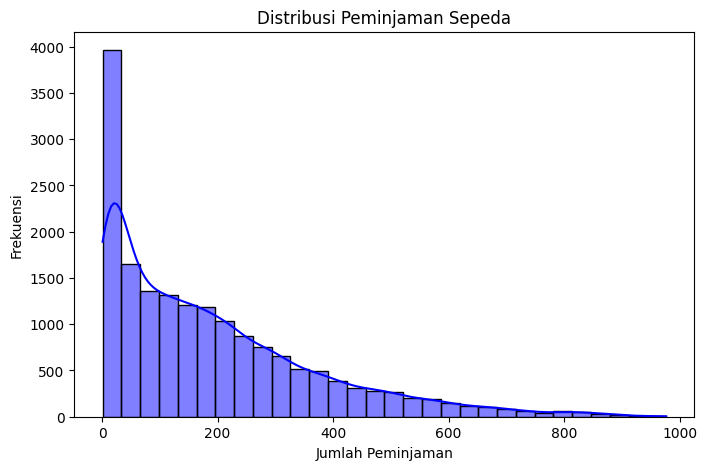

In [8]:
# Histogram jumlah peminjaman sepeda
plt.figure(figsize=(8, 5))
sns.histplot(df["cnt"], bins=30, kde=True, color="blue")
plt.title("Distribusi Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()


**Insight:**

- Distribusi jumlah peminjaman sepeda terlihat tidak simetris, kemungkinan skewed ke kanan (lebih banyak peminjaman rendah dibanding tinggi).
- Ada beberapa nilai ekstrem (outlier) dengan jumlah peminjaman sangat tinggi, yang mungkin terjadi di jam-jam sibuk.

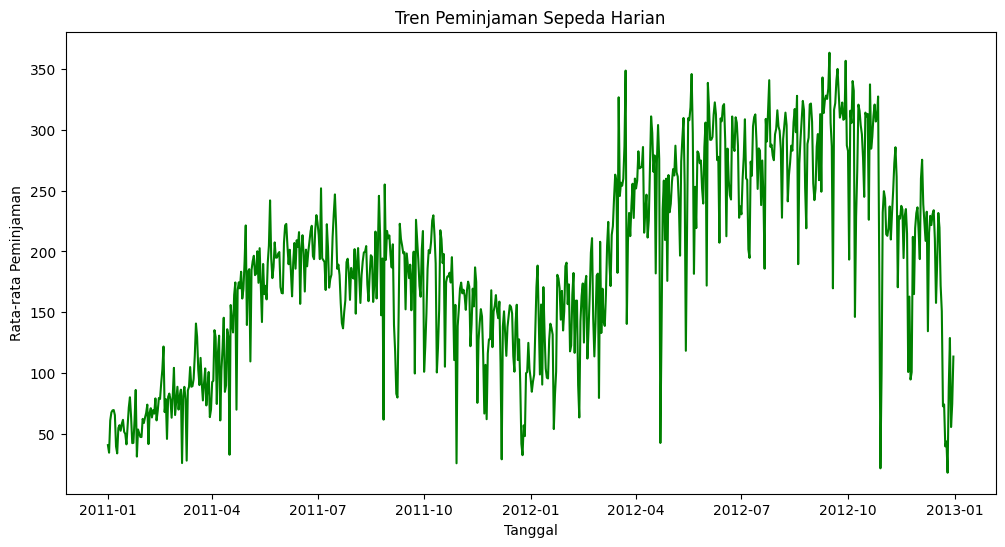

In [9]:
# Tren rata-rata peminjaman sepeda per hari
df["dteday"] = pd.to_datetime(df["dteday"])
daily_avg = df.groupby("dteday")["cnt"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values, color="green")
plt.title("Tren Peminjaman Sepeda Harian")
plt.xlabel("Tanggal")
plt.ylabel("Rata-rata Peminjaman")
plt.show()


**Insight:**

- Tren naik dari awal 2011 hingga pertengahan 2012, lalu menurun di akhir 2012.
- Fluktuasi tajam kemungkinan dipengaruhi oleh pola hari kerja vs akhir pekan.
- Penurunan di akhir tahun bisa disebabkan oleh faktor musim/cuaca buruk atau hari libur besar.
- Perlu analisis lebih lanjut untuk melihat pengaruh cuaca dan perbedaan antara hari kerja vs akhir pekan.

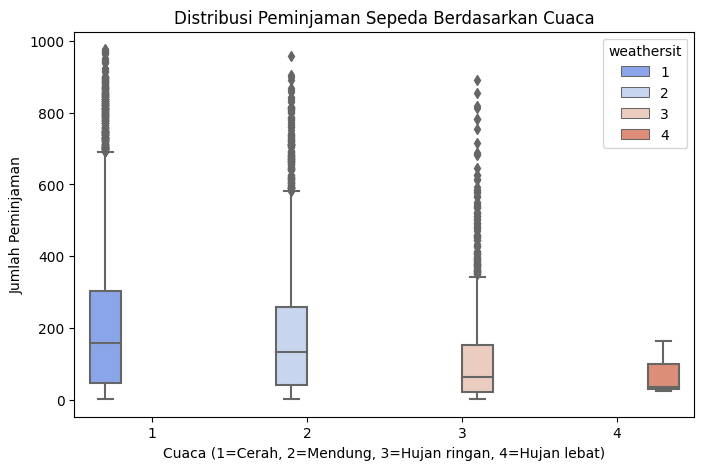

In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(x="weathersit", y="cnt", hue="weathersit", data=df, palette="coolwarm")

# Menghapus legenda
plt.legend().remove()

plt.title("Distribusi Peminjaman Sepeda Berdasarkan Cuaca")
plt.xlabel("Cuaca (1=Cerah, 2=Mendung, 3=Hujan ringan, 4=Hujan lebat)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**

- Cuaca cerah (1) & mendung (2) → jumlah peminjaman lebih tinggi dibandingkan hujan.
- Hujan ringan (3) & hujan lebat (4) → jumlah peminjaman menurun drastis, terutama saat hujan lebat.
- Banyak outlier pada semua kondisi cuaca, tetapi jumlah peminjaman tetap lebih tinggi saat cuaca cerah.
- Saat hujan, permintaan sepeda menurun, sehingga operator bisa menyesuaikan jumlah sepeda yang tersedia.

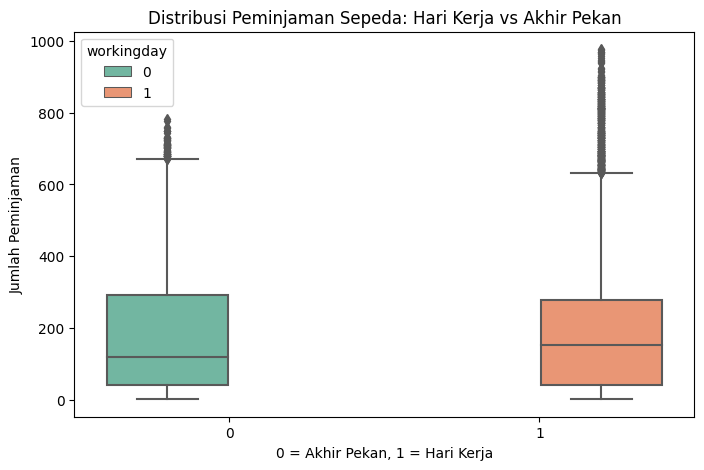

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="workingday", y="cnt", hue="workingday", data=df, palette="Set2")

plt.title("Distribusi Peminjaman Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("0 = Akhir Pekan, 1 = Hari Kerja")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**

- Distribusi peminjaman sepeda pada hari kerja (1) & akhir pekan (0) cukup mirip, tetapi median jumlah peminjaman sedikit lebih tinggi pada hari kerja.
- Hari kerja memiliki lebih banyak outlier (jumlah peminjaman sangat tinggi) dibanding akhir pekan.
- Variasi peminjaman lebih besar di hari kerja, menunjukkan bahwa faktor seperti jam sibuk atau aktivitas kantor mungkin mempengaruhi pola peminjaman.
- Strategi penyediaan sepeda bisa disesuaikan, misalnya dengan menambah sepeda pada jam sibuk di hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

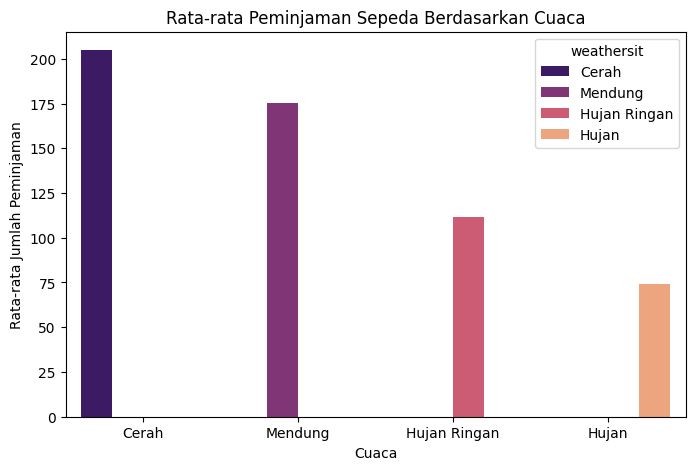

In [21]:
# Rata-rata jumlah peminjaman per kategori cuaca
weather_avg = df.groupby("weathersit")["cnt"].mean().reset_index()

# Mapping nilai cuaca ke label yang lebih deskriptif
weather_labels = {1: "Cerah", 2: "Mendung", 3: "Hujan Ringan", 4: "Hujan"}
weather_avg["weathersit"] = weather_avg["weathersit"].map(weather_labels)

# Visualisasi Rata-rata
plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", data=weather_avg, hue="weathersit", palette="magma")

plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.show()


**Insight:**
- Peminjaman sepeda turun drastis saat cuaca buruk. Perusahaan bisa menyiapkan perlindungan ekstra (jas hujan, tempat berteduh).

### Pertanyaan 2:

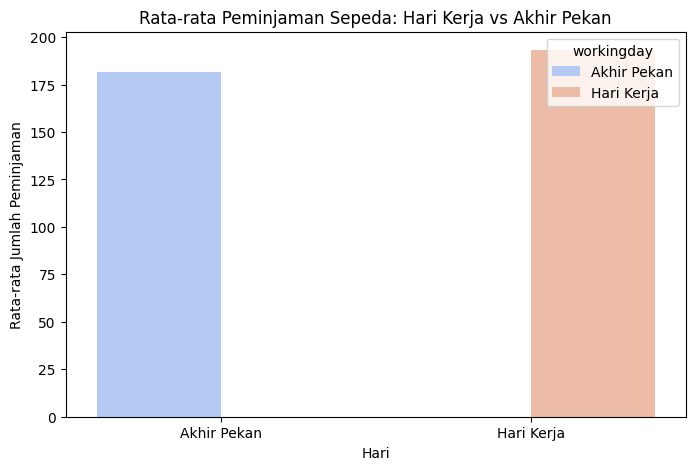

In [24]:
# Menghitung rata-rata peminjaman sepeda berdasarkan hari kerja/akhir pekan
workday_avg = df.groupby("workingday")["cnt"].mean().reset_index()
workday_avg["workingday"] = workday_avg["workingday"].map({1: "Hari Kerja", 0: "Akhir Pekan"})

# Visualisasi Rata-rata
plt.figure(figsize=(8, 5))
sns.barplot(x="workingday", y="cnt", data=workday_avg, hue="workingday", palette="coolwarm")

plt.title("Rata-rata Peminjaman Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.show()

**Insight:**
- Peminjaman lebih tinggi di hari kerja, menunjukkan pola commuting. Perusahaan bisa menyesuaikan jumlah sepeda yang tersedia dengan menambah sepeda pada jam sibuk di hari kerja.

## Conclusion

- Peminjaman sepeda cenderung meningkat selama pertengahan tahun dan menurun mendekati akhir tahun. Perusahaan dapat mengalokasikan lebih banyak sepeda selama musim dengan permintaan tinggi.
- Cuaca memiliki dampak signifikan terhadap peminjaman. Saat hujan lebat, jumlah peminjaman jauh lebih rendah. Perusahaan bisa menyediakan layanan tambahan seperti jas hujan atau menawarkan diskon untuk menarik pengguna di cuaca buruk.
- Peminjaman pada hari kerja dan akhir pekan memiliki pola yang berbeda. Pada hari kerja, peminjaman cenderung lebih tinggi dengan variasi yang lebih besar, kemungkinan karena aktivitas rutin seperti perjalanan kerja atau sekolah. Perusahaan bisa menyesuaikan jumlah sepeda yang tersedia berdasarkan pola ini.
- Analisis ini dapat digunakan untuk mengoptimalkan strategi pengelolaan sepeda, perencanaan operasional, serta program promosi untuk meningkatkan jumlah peminjaman sepeda.

In [25]:
df.to_csv("all_data.csv", index=False)